## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## Import Data

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
X = dataset.iloc[:, 3:13].values
for i in range(3):
    print(X[i])

[619 'France' 'Female' 42 2 0.0 1 1 1 101348.88]
[608 'Spain' 'Female' 41 1 83807.86 1 0 1 112542.58]
[502 'France' 'Female' 42 8 159660.8 3 1 0 113931.57]


In [4]:
y = dataset['Exited'].values
for i in range(3):
    print(y[i])

1
0
1


## Preprocessing

In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [6]:
le_X_1 = LabelEncoder()
X[:, 1] = le_X_1.fit_transform(X[:, 1])

le_X_2 = LabelEncoder()
X[:, 2] = le_X_2.fit_transform(X[:,2])

ohe = ColumnTransformer([("ohe", OneHotEncoder(dtype=float),[1])],
                        remainder="passthrough"
                        )
X = ohe.fit_transform(X)
X = X[:, 1:]

## Spliting Train and Test Data

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

## XGBoost Implementation

In [8]:
from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

## Visualizing the Confusing Matrix

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
cm

array([[2471,  324],
       [ 146,  359]])

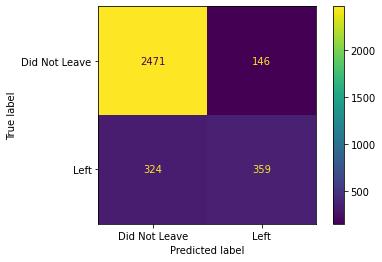

In [10]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test, display_labels=['Did Not Leave', 'Left']) 